## Level 2 *Learn Maching Learning* series on Kaggle
This is the level 2 part of the *Learn Machine Learning* series on Kaggle using Python (https://www.kaggle.com/learn/machine-learning). The data used is from the [*Home Prices: Advanced Regression Techniques*](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition.

Like the post for level 1, this post will show the section name, my code from the corresponding section for the instructions under **Your Turn**, and some brief notes on what is taught in each section.

First I'll run the necessary code from before and add a new function, score_dataset.

In [1]:
# Import the necessary libraries
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Save filepath to variable
training_data_filepath = "C:/Development/Kaggle/House Prices - Advanced \
Regression Techniques/train.csv"

# Read the data and store in a dataframe called training_set
training_set = pd.read_csv(training_data_filepath)

# Select the target variable and call it y
y = training_set.SalePrice

# Create the dataframe with only numeric predictors, dropping Id and SalePrice
X = training_set.drop(["Id", "SalePrice"], axis=1)\
        .select_dtypes(exclude=["object"])

# Split data into training and validation data, for both predictors and
# target.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                 train_size=0.7,
                                                 test_size=0.3)

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

### Section 1
[Handling Missing Values](https://www.kaggle.com/dansbecker/handling-missing-values)

This section teaches multiple approaches for dealing with missing data fields.

In [2]:
# Detect which columns have missing values
print(X.isnull().sum())

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64


In [3]:
# Get model score from dropping columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test = X_test.drop(cols_with_missing, axis=1)

print("Mean Absolute Error from dropping columns with missing values:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

Mean Absolute Error from dropping columns with missing values:
18857.420547945203


In [4]:
# Get model score from Imputation
from sklearn.preprocessing import Imputer

my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)

# "fit_transform" is the training step. It "learns" based upon the training set data.
# "transform" uses the newly trained model to make predictions on the "test set"
# (a.k.a. "validation set" in the the first tutorial).

print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Absolute Error from Imputation:
17744.28310502283


In [5]:
# Get model score from Imputation with extra columns showing what was imputed
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns
                    if X_train[col].isnull().any())

for col in cols_with_missing:
    imputed_X_train_plus[col + "_was_missing"] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + "_was_missing"] = imputed_X_test_plus[col].isnull()

# Imputation
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while tracking what was imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

Mean Absolute Error from Imputation while tracking what was imputed:
18650.899999999998


### Section 2
[Using Categorical Data with One Hot Encoding](https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding)

In this section you learn how to handle categorical data by using one hot encoding, which creates new columns for each value in the categorical field. The new columns will have either a 1 or 0 in them.

In [6]:
# Using cardinality as a way to select categorical data. "cardinality" means
# the number of unique values in a column.
candidate_train_predictors = training_set.drop(["Id", "SalePrice"], axis=1)

low_cardinality_cols = [cname for cname in candidate_train_predictors if
                       candidate_train_predictors[cname].nunique() < 10 and
                       candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors if
               candidate_train_predictors[cname].dtype in
                ["int64", "float64"]]

my_cols = low_cardinality_cols + numeric_cols
X = candidate_train_predictors[my_cols]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    train_size=0.7,
                                                    test_size=0.3)

# Using one hot encoding the categorical variables
X_train_one_hot_encoded = pd.get_dummies(X_train)
X_test_one_hot_encoded = pd.get_dummies(X_test)

# Make sure the columns show up in the same order by using the align method
# "join='inner'" is like an inner join in SQL, keeping only the columns in
# both datasets
X_train_final, X_test_final = X_train_one_hot_encoded.align(
    X_test_one_hot_encoded,
    join="inner",
    axis=1)

# Impute the missing data
my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train_final)
imputed_X_test = my_imputer.transform(X_test_final)

# Show model score
print("Mean Absolute Error with Imputation and One Hot Encoding:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Absolute Error with Imputation and One Hot Encoding:
19467.863470319633


### Section 3
[Learning to Use XGBoost](https://www.kaggle.com/dansbecker/learning-to-use-xgboost)

This section covers XGBoost, the leading model for working with standard tabular data.

In [7]:
# Import XGBoost
from xgboost import XGBRegressor


xgb_model = XGBRegressor()
xgb_model.fit(imputed_X_train, y_train, verbose=False)

c:\users\micha\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [8]:
# Make predictions
xgb_predictions = xgb_model.predict(imputed_X_test)

print("XGBoost Mean Absolute Error:" + 
      str(mean_absolute_error(xgb_predictions, y_test)))

XGBoost Mean Absolute Error:16458.5521814355


In [9]:
# Tune the model by adding n_estimators and early_stopping_rounds
xgb_model = XGBRegressor(n_estimators=1000)
xgb_model.fit(imputed_X_train, y_train, early_stopping_rounds=20,
              eval_set=[(imputed_X_test, y_test)], verbose=False)

print("Model best_score: " + str(xgb_model.best_score))
print("Model best_iteration: " + str(xgb_model.best_iteration))
print("Model best_ntree_limit:" + str(xgb_model.best_ntree_limit))

Model best_score: 27433.203125
Model best_iteration: 87
Model best_ntree_limit:88


In [10]:
# Run the model with the best_iteration and best_ntree_limit, then predict
xgb_model_bi = XGBRegressor(n_estimators=87)
xgb_model_bi.fit(imputed_X_train, y_train,
              eval_set=[(imputed_X_test, y_test)], verbose=False)

xgb_predictions_bi = xgb_model_bi.predict(imputed_X_test)

xgb_model_bnl = XGBRegressor(n_estimators=88)
xgb_model_bnl.fit(imputed_X_train, y_train,
              eval_set=[(imputed_X_test, y_test)], verbose=False)

xgb_predictions_bnl = xgb_model_bnl.predict(imputed_X_test)

print("XGBoost Mean Absolute Error with best_iteration: " + 
      str(mean_absolute_error(xgb_predictions_bi, y_test)))
print("XGBoost Mean Absolute Error with best_ntree_limit: " + 
      str(mean_absolute_error(xgb_predictions_bnl, y_test)))

XGBoost Mean Absolute Error with best_iteration: 16450.916060216896
XGBoost Mean Absolute Error with best_ntree_limit: 16445.990261130137


### Section 4
[Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-dependence-plots)

This section explains how extract insights from your models using partial dependence plots, which show how each variable or predictor affects the model's predictions.

In [12]:
# Create a function that returns X and y
def get_data(df, cols_to_use):
    y = df.SalePrice
    X = df[cols_to_use]
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        random_state=42)
    my_imputer = Imputer()
    imputed_X_train = my_imputer.fit_transform(X_train)
    imputed_X_test = my_imputer.fit_transform(X_test)
    return imputed_X_train, imputed_X_test, y_train, y_test


# Create a list of three predictor variables
predictors = ["LotArea", "YearBuilt", "TotRmsAbvGrd"]

# Call the function
X_train, X_test, y_train, y_test = get_data(training_set, predictors)

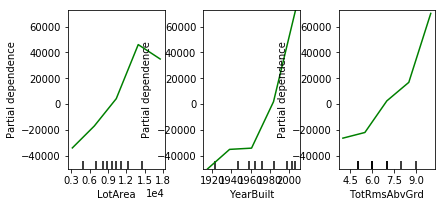

In [27]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
%matplotlib inline


my_model = GradientBoostingRegressor()
my_model.fit(X_train, y_train)

# Hypotheses for each predictor
# As LotArea increases, SalePrice increases
# As YearBuilt increases, SalePrice increases
# As TotRmsAbvGrd increases, SalePrice increases
my_plots = plot_partial_dependence(my_model,
                                  features=[0, 1, 2],
                                  X=X_train,
                                  feature_names=["LotArea",
                                                 "YearBuilt",
                                                 "TotRmsAbvGrd"],
                                  grid_resolution=5)

After a certain LotArea, SalePrice begins to decrease. With YearBuilt, there is a leveling off for about 20 years.

### Section 5
[Pipelines](https://www.kaggle.com/dansbecker/pipelines)

This section covers pipelines and how they make your code cleaner and more professional.

In [32]:
# Create the data with one hot encoding
candidate_train_predictors = training_set.drop(["Id", "SalePrice"], axis=1)

low_cardinality_cols = [cname for cname in candidate_train_predictors if
                       candidate_train_predictors[cname].nunique() < 10 and
                       candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors if
               candidate_train_predictors[cname].dtype in
                ["int64", "float64"]]

my_cols = low_cardinality_cols + numeric_cols
X = candidate_train_predictors[my_cols]
y = training_set.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    train_size=0.7,
                                                    test_size=0.3)

# Using one hot encoding the categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Make sure the columns show up in the same order by using the align method
# "join='inner'" is like an inner join in SQL, keeping only the columns in
# both datasets
X_train, X_test = X_train_one_hot_encoded.align(
    X_test_one_hot_encoded,
    join="inner",
    axis=1)

In [33]:
# Import library
from sklearn.pipeline import make_pipeline


# Create the pipeline
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

# Fit and predict using the pipeline
my_pipeline.fit(X_train, y_train)
predictions = my_pipeline.predict(X_test)

# Print MAE
print("Mean Absolue Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolue Error: 18488.350456621003


### Section 6
[Cross-Validation](https://www.kaggle.com/dansbecker/cross-validation)

This section covers cross-validation, which gives you a more reliable measure of your model's quality.

In [34]:
# Create the data and make the pipeline
y = training_set.SalePrice

predictors = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath",
              "BedroomAbvGr", "TotRmsAbvGrd"]

X = training_set[predictors]

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [35]:
# Import library
from sklearn.model_selection import cross_val_score


# Get the cross-validation scores
scores = cross_val_score(my_pipeline, X, y,
                         scoring="neg_mean_absolute_error")

print(scores)

[-24443.90410678 -23786.99218735 -26121.82170782]


In [36]:
# Print the average of the scores to get a single measure
print("Mean Absolute Error: {0}".format(-1 * scores.mean()))

Mean Absolute Error: 24784.239333980775


In [37]:
# Remove YearBuilt and rerun
predictors = ["LotArea", "1stFlrSF", "2ndFlrSF", "FullBath",
              "BedroomAbvGr", "TotRmsAbvGrd"]

X = training_set[predictors]

scores = cross_val_score(my_pipeline, X, y,
                         scoring="neg_mean_absolute_error")

print(scores)
print("Mean Absolute Error: {0}".format(-1 * scores.mean()))

[-30352.7065024  -28453.64606434 -30964.78559671]
Mean Absolute Error: 29923.712721147644


In [38]:
# Use all numeric fields and rerun
X = training_set.drop(["Id", "SalePrice"], axis=1)\
        .select_dtypes(exclude=["object"])

scores = cross_val_score(my_pipeline, X, y,
                         scoring="neg_mean_absolute_error")

print(scores)
print("Mean Absolute Error: {0}".format(-1 * scores.mean()))

[-19919.96721424 -18967.31334702 -20727.88621399]
Mean Absolute Error: 19871.722258417063
